<a href="https://colab.research.google.com/github/rishavraj9/Human-Facial-expression-detection-using-TensorFlow-and-keras/blob/main/Miniproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

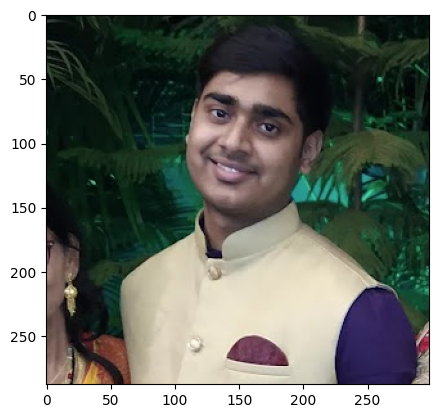

In [ ]:
img = image.load_img("/content/drive/MyDrive/Imageprocessing/training/Happyface/Screenshot 2024-07-06 235910.png")
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Imageprocessing/training/Happyface/Screenshot 2024-07-06 235910.png").shape

(288, 298, 3)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/Imageprocessing/training",target_size=(200,200),batch_size=3,class_mode="binary")
validation_dataset=validation.flow_from_directory("/content/drive/MyDrive/Imageprocessing/Verification",target_size=(200,200),batch_size=3,class_mode="binary")

Found 27 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    #
                                    tf.keras.layers.Dense(1,activation="sigmoid")
                                    ])

In [ ]:
model.compile(loss="binary_crossentropy",optimizer= RMSprop(lr=0.001),metrics=["accuracy"])
model.fit = model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 14s 5s/step - loss: 1.3341 - accuracy: 0.6667 - val_loss: 0.6738 - val_accuracy: 0.5556
Epoch 2/10
3/3 [==============================] - 2s 735ms/step - loss: 0.7298 - accuracy: 0.4444 - val_loss: 0.7110 - val_accuracy: 0.4444
Epoch 3/10
3/3 [==============================] - 2s 839ms/step - loss: 0.5455 - accuracy: 0.7778 - val_loss: 1.3774 - val_accuracy: 0.5556
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.4514 - accuracy: 0.6667 - val_loss: 0.6687 - val_accuracy: 0.5556
Epoch 5/10
3/3 [==============================] - 2s 730ms/step - loss: 0.7990 - accuracy: 0.5556 - val_loss: 0.6621 - val_accuracy: 0.5556
Epoch 6/10
3/3 [==============================] - 2s 786ms/step - loss: 0.6668 - accuracy: 0.4444 - val_loss: 0.6494 - val_accuracy: 0.8889
Epoch 7/10
3/3 [==============================] - 2s 784ms/step - loss: 0.6624 - accuracy: 0.6667 - val_loss: 0.6332 - val_accuracy: 0.8889
Epoch 8/10
3/3 [=========

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
validation_dataset.class_indices

{'Happyface': 0, 'Unhappy': 1}

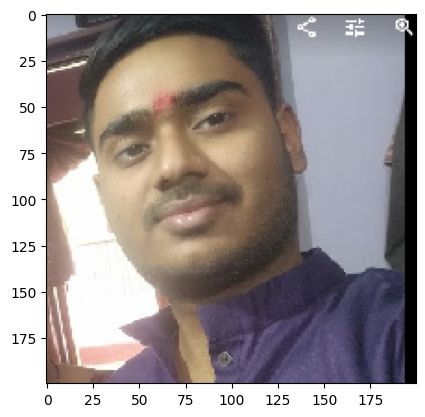

1/1 [==============================] - 0s 134ms/step
Happy


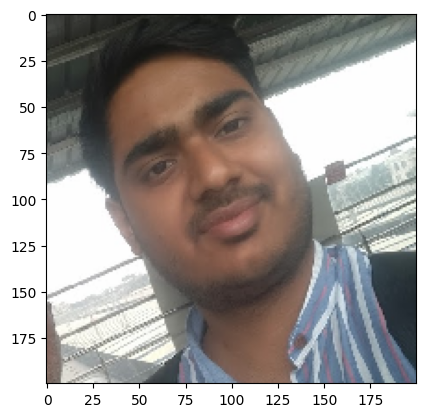

1/1 [==============================] - 0s 44ms/step
Happy


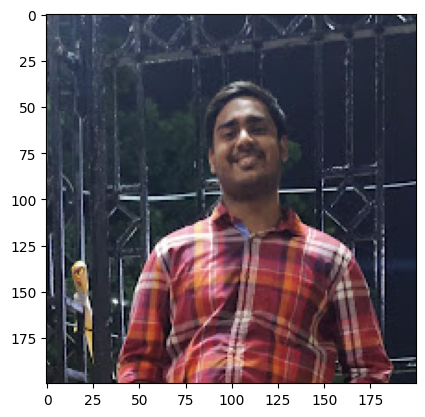

1/1 [==============================] - 0s 64ms/step
Happy


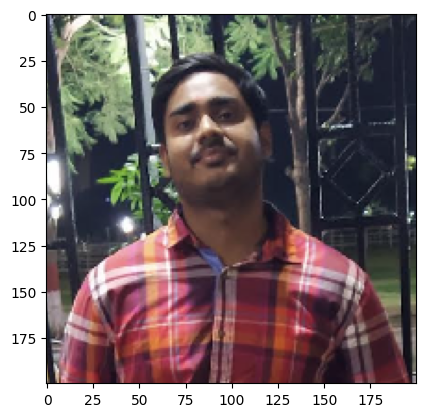

1/1 [==============================] - 0s 44ms/step
Happy


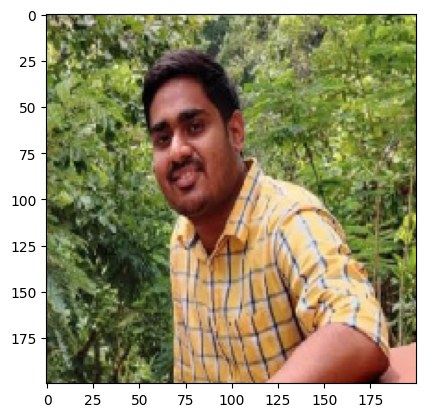

1/1 [==============================] - 0s 62ms/step
Happy


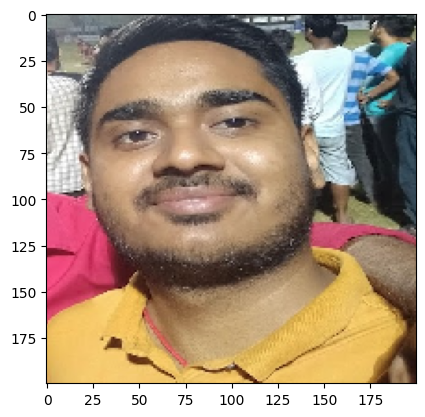

1/1 [==============================] - 0s 46ms/step
Happy


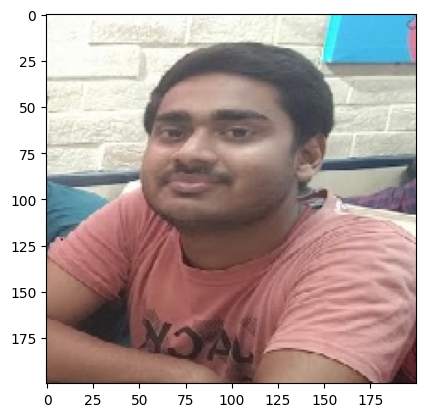

1/1 [==============================] - 0s 43ms/step
Happy


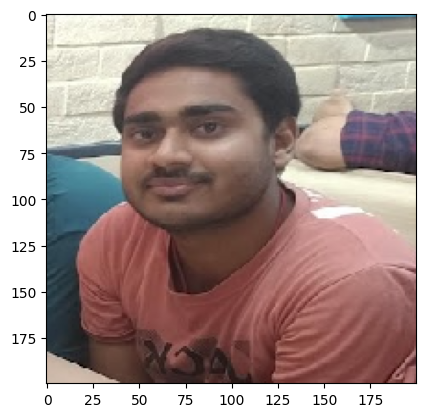

1/1 [==============================] - 0s 46ms/step
Happy


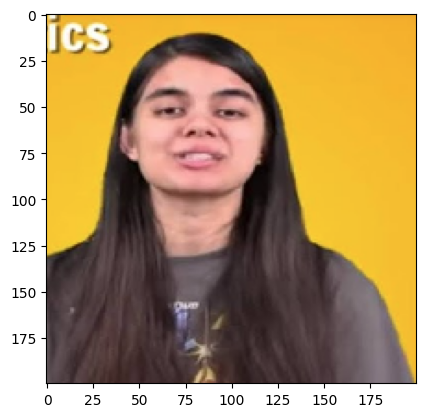

1/1 [==============================] - 0s 44ms/step
Happy


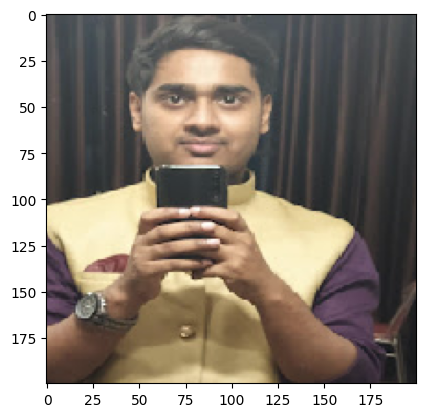

1/1 [==============================] - 0s 65ms/step
Happy


In [ ]:
dir_path = "/content/drive/MyDrive/Imageprocessing/testing"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"//"+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=model.predict(images)
  if val==0:
    print("Not Happy")
  else:
    print("Happy")